# 0. Car sales in Norway - emissions and trends

## Dataset: norway_new_car_sales_by_month.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("norway_new_car_sales_by_month.csv")

## a) Do some EDA with info, find out column names, shape of dataset, describe method to get summary descriptive statistics.

In [3]:
# dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               121 non-null    int64  
 1   Month              121 non-null    int64  
 2   Quantity           121 non-null    int64  
 3   Quantity_YoY       121 non-null    int64  
 4   Import             121 non-null    int64  
 5   Import_YoY         121 non-null    int64  
 6   Used               61 non-null     float64
 7   Used_YoY           49 non-null     float64
 8   Avg_CO2            121 non-null    int64  
 9   Bensin_Co2         121 non-null    int64  
 10  Diesel_Co2         121 non-null    int64  
 11  Quantity_Diesel    121 non-null    int64  
 12  Diesel_Share       121 non-null    float64
 13  Diesel_Share_LY    121 non-null    float64
 14  Quantity_Hybrid    73 non-null     float64
 15  Quantity_Electric  73 non-null     float64
 16  Import_Electric    53 non-

Shows: 
- column name
- data types
- missing values

In [5]:
df.shape

(121, 17)

(rows, columns)

In [6]:
df.columns

Index(['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY',
       'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2',
       'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid',
       'Quantity_Electric', 'Import_Electric'],
      dtype='object')

### Summary statistics

In [7]:
df.describe()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,61.000000,49.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,73.000000,73.000000,53.000000
mean,2011.545455,6.454545,11134.297521,392.586777,2204.371901,-135.049587,36864.737705,973.122449,129.520661,133.735537,141.396694,6582.355372,60.512397,62.278512,1255.219178,1154.109589,306.924528
std,2.915476,3.488075,1752.046397,1789.539953,573.127896,545.395787,4230.548664,2728.915662,22.719338,17.094233,10.847795,1596.675812,15.802049,13.128647,1059.443502,875.792142,165.086906
min,2007.000000,1.000000,5353.000000,-4548.000000,1048.000000,-1810.000000,24106.000000,-6261.000000,84.000000,94.000000,118.000000,3422.000000,26.300000,38.000000,159.000000,43.000000,33.000000
25%,2009.000000,3.000000,10250.000000,-526.000000,1812.000000,-495.000000,34212.000000,-392.000000,110.000000,120.000000,133.000000,5434.000000,48.500000,49.400000,443.000000,309.000000,197.000000
50%,2012.000000,6.000000,11385.000000,493.000000,2263.000000,-114.000000,37079.000000,855.000000,132.000000,131.000000,136.000000,6583.000000,68.700000,68.700000,899.000000,1260.000000,286.000000
75%,2014.000000,9.000000,12337.000000,1445.000000,2625.000000,162.000000,39797.000000,2708.000000,151.000000,150.000000,151.000000,7808.000000,73.700000,74.000000,1556.000000,1906.000000,433.000000
max,2017.000000,12.000000,14207.000000,5227.000000,3768.000000,1334.000000,44106.000000,5896.000000,162.000000,165.000000,166.000000,10072.000000,81.400000,81.400000,4419.000000,3391.000000,746.000000


- Mean, median, std, min, max
- Only for numeric columns

## b) Draw a line chart of quantity for each year. Is there a year that should be skipped?

In [22]:
df.groupby("Year")["Month"].nunique()

Year
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017     1
Name: Month, dtype: int64

- A year with missing months (last year) should be skipped to avoid missleading data. 

In [31]:
df.groupby("Year")["Month"].nunique().loc[lambda x: x == 12]

df_complete = df[df["Year"].isin(complete_years)]

df_complete["Year"].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [18]:
df.columns

Index(['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY',
       'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2',
       'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid',
       'Quantity_Electric', 'Import_Electric'],
      dtype='object')

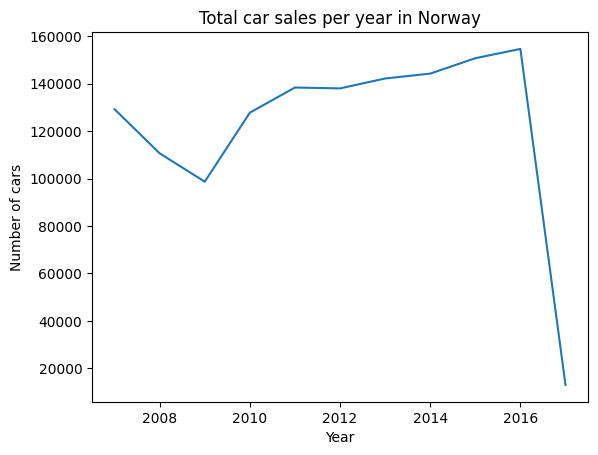

In [11]:
qty_per_year = df.groupby("Year")["Quantity"].sum()

qty_per_year.plot(kind="line")
plt.title("Total car sales per year in Norway")
plt.ylabel("Number of cars")
plt.xlabel("Year")
plt.show()


##  c) Draw a line chart of average CO2 emissions for same years that as in b)

In [17]:
df.columns

Index(['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY',
       'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2',
       'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid',
       'Quantity_Electric', 'Import_Electric'],
      dtype='object')

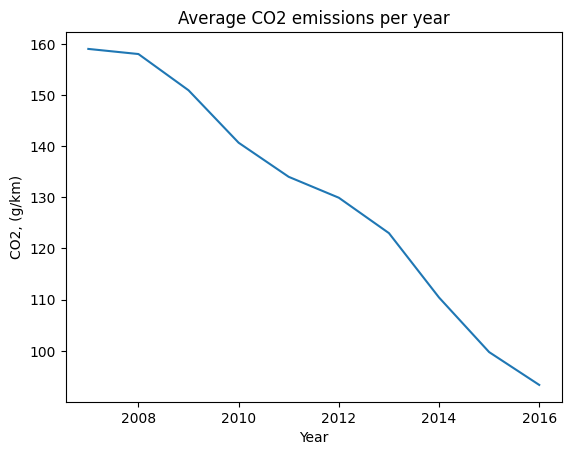

In [32]:
# I europeisk fordonsstatistik mäts CO₂-utsläpp i gram per kilometer (g/km)..
co2_per_year = df_complete.groupby("Year")["Avg_CO2"].mean()

co2_per_year.plot(kind="line")
plt.title("Average CO2 emissions per year")
plt.ylabel("CO2, (g/km)")
plt.xlabel("Year")
plt.show()

## d) Draw a line chart of all years and months for import

In [37]:
# year + month
df["date"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str))


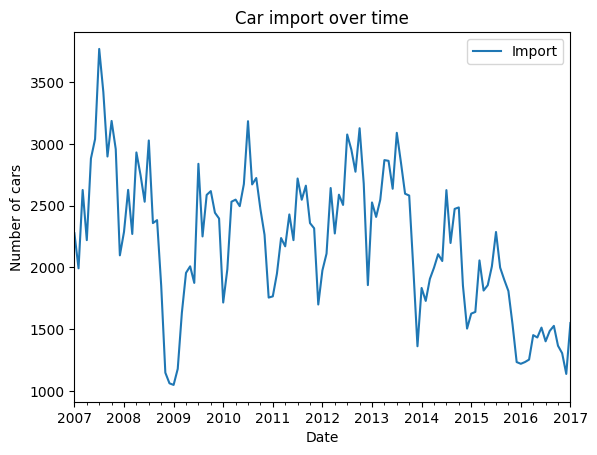

In [38]:
df.plot(x="date", y="Import", kind="line")
plt.title("Car import over time")
plt.ylabel("Number of cars")
plt.xlabel("Date")
plt.show()

## e) Draw a line chart of all years and months for average CO2 emissions

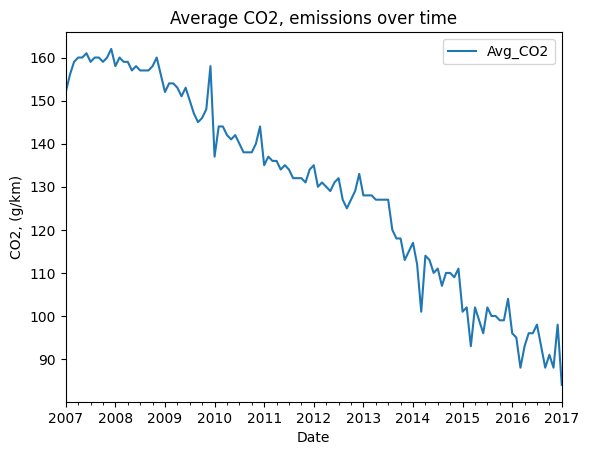

In [39]:
df.plot(x="date", y="Avg_CO2", kind="line")
plt.title("Average CO2, emissions over time")
plt.ylabel("CO2, (g/km)")
plt.xlabel("Date")
plt.show()

##   f) Draw a line chart of all years and months for electric cars import where it's relevant.

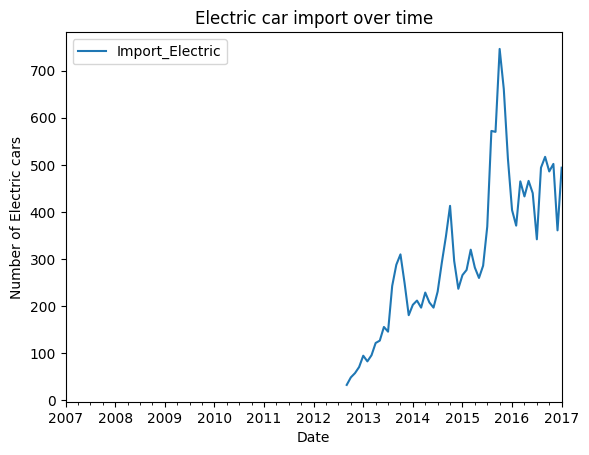

In [41]:
df.plot(x="date", y="Import_Electric", kind="line")
plt.title("Electric car import over time")
plt.ylabel("Number of Electric cars")
plt.xlabel("Date")
plt.show()

## g) Draw a line chart of average diesel share per year

In [42]:
df.columns

Index(['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY',
       'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2',
       'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid',
       'Quantity_Electric', 'Import_Electric', 'date'],
      dtype='object')

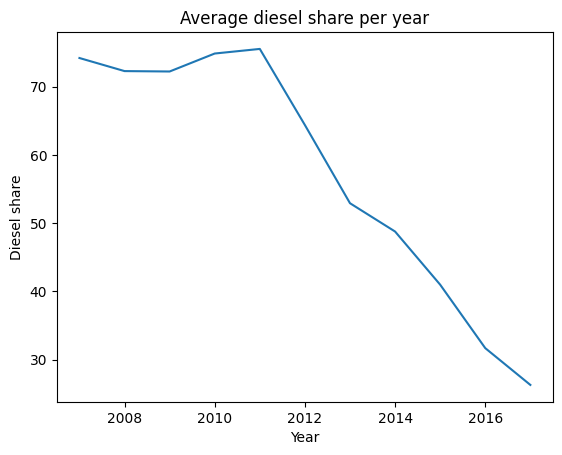

In [43]:
diesel_per_year = df.groupby("Year")["Diesel_Share"].mean()

diesel_per_year.plot(kind="line")
plt.title("Average diesel share per year")
plt.ylabel("Diesel share")
plt.xlabel("Year")
plt.show()